https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/6737946-entrainez-vous-selectionnez-le-nombre-de-voisins-dans-un-knn-pour-une-regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

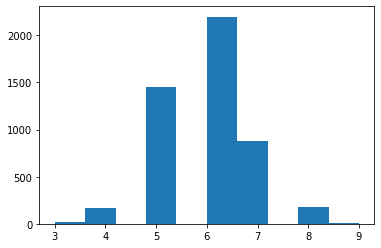

In [6]:
plt.hist(data['quality'])

In [7]:
X = data[data.columns[:-1]].values
y = data['quality'].values

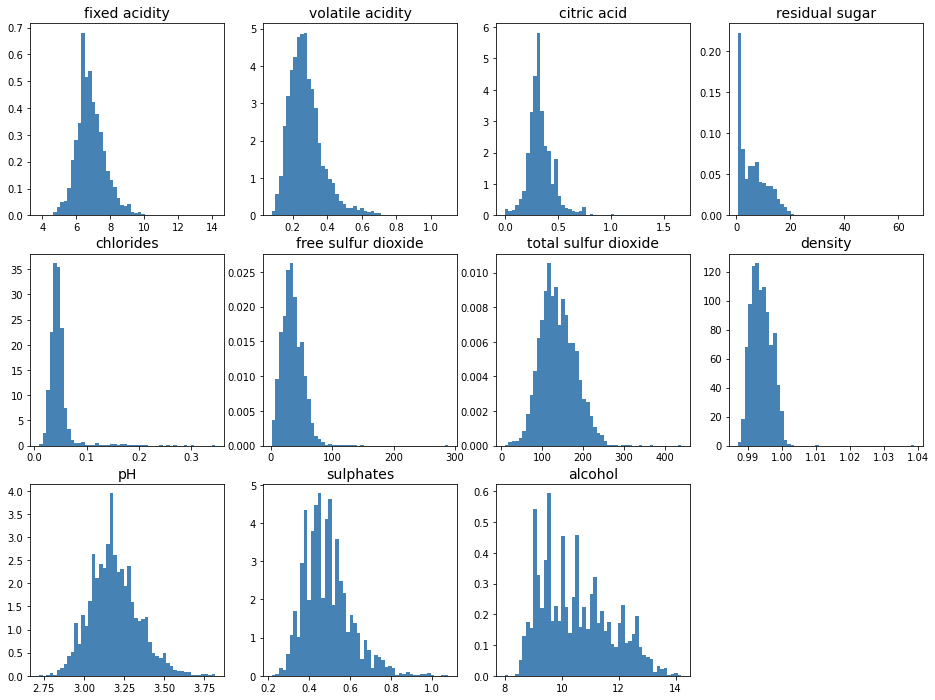

In [8]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

A bad wine has a quality < 6

Our class is:
* 0 : bad wine
* 1 : hhmm tasty !


// TODO
The following analysis requires that the positive class (what we are looking for) is the minority class. This is ok in our case because we saw the distribution of the feature above less values < 6)

In [9]:
y_class = np.where(y<6, 0, 1)

Do the split btw train set and test set

In [10]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=0.3)

Data is not on the same scale for all features, to allow a better repartition of the 'influence' of the feature, we scale them

In [11]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

Create a GridSearchCV, providing a KNearest Neighbors estimator

In [12]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

score = 'accuracy'

clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring=score
)

In [13]:
clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [14]:
clf.best_params_

{'n_neighbors': 5}

In [15]:
print("Result of cross validation:")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],
        clf.cv_results_['std_test_score'],
        clf.cv_results_['params']
):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Result of cross validation:
accuracy = 0.746 (+/-0.015) for {'n_neighbors': 3}
accuracy = 0.753 (+/-0.014) for {'n_neighbors': 5}
accuracy = 0.744 (+/-0.030) for {'n_neighbors': 7}
accuracy = 0.751 (+/-0.030) for {'n_neighbors': 9}
accuracy = 0.747 (+/-0.028) for {'n_neighbors': 11}
accuracy = 0.747 (+/-0.025) for {'n_neighbors': 13}
accuracy = 0.744 (+/-0.022) for {'n_neighbors': 15}


In [16]:
y_pred = clf.predict(X_test_std)
print("\n accuracy on test set : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


 accuracy on test set : 0.750


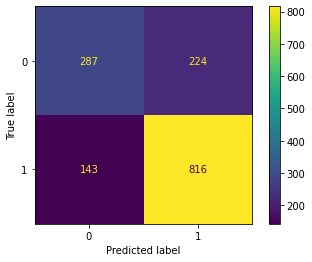

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='viridis')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7503401360544217

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.8508863399374348

In [20]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7846153846153846

Precision-Recall curve, shows how the model is good to predict positive class.
* having a recall = 1, means we identify only good wines, no False Positives but most probably we will miss some (generating False Negatives)
* having a precision = 1, means we identify all the good wines, but we may also identifies bad wine as being good (generating False Positives)

Each point is given on a particular threshold: indeed the model provides 'probabilities' of returning a class. The threshold can be slightly changed to consider a probability is actually to define in one or the otther class.

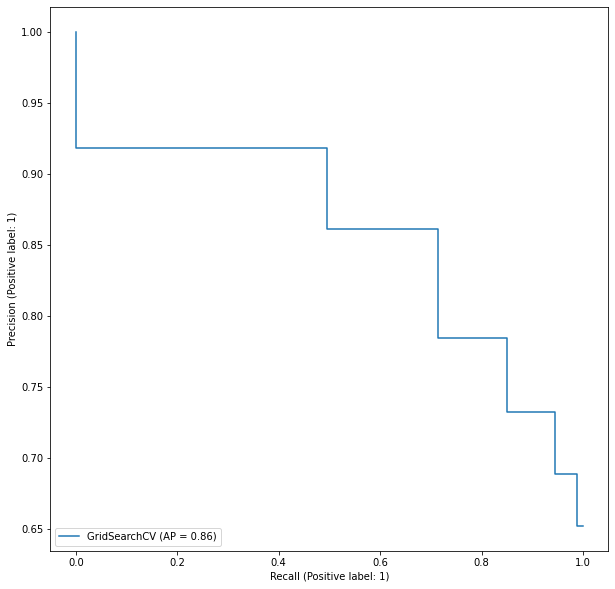

In [21]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(10, 10))
PrecisionRecallDisplay.from_estimator(clf, X_test_std, y_test, ax=ax)
plt.show()

Here the probability of predictions on the test set (fist column: class 0, second column: class 1)

In [22]:
clf.predict_proba(X_test_std)

array([[0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       ...,
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ]])

In [23]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]


The ROC curve, show the capacity of the model to generate False Positives vs True Positives

x-axis: $ FPR = (1 - specificity) = 1 - TNR = 1 - \frac{TN}{TN+FP}$

y-axis: $ TPR = recall = sensitivity = \frac{TP}{TP+FN} $

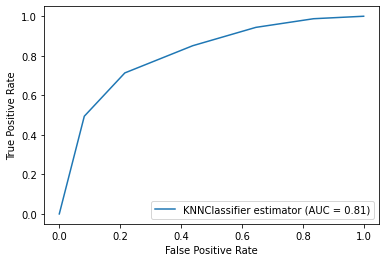

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNNClassifier estimator')
display.plot()
plt.show()


In [25]:
clf.score(X_test_std, y_test)

0.7503401360544217

In [26]:
from sklearn import metrics
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.50


In [27]:
from sklearn import dummy
dum = dummy.DummyClassifier(strategy='most_frequent')

dum.fit(X_train_std, y_train)

y_pred_dum = dum.predict(X_test_std)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))

RMSE : 0.59


Oups... our model has poor performance, RMSE is lower than the dummy 'most frequent' classifier

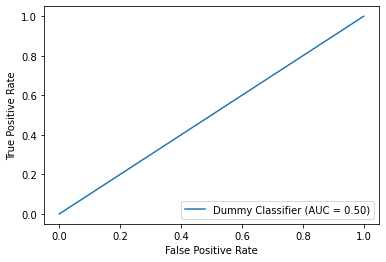

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dum)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Dummy Classifier')
display.plot()
plt.show()